In [5]:
import numpy as np
import matplotlib.pyplot as plt
from ipyparallel import Client
rc = Client()
dview = rc[:]

In [6]:
data = np.load('../../neuroscience dataset/fluordata1.npy')
data.shape

(86, 115757)

In [7]:
def binarize(signal, percentile=0.5, bins=800, disp=False):
    import numpy as np
    import matplotlib.pyplot as plt
    d, b, _ = plt.hist(signal, bins=bins)
    # find peak
    peak = b[np.argmax(d)]
    low = np.percentile(signal[signal<=peak], percentile)
    high = 2 * peak - low
    if disp:
        plt.plot([peak, peak], [0, 200], 'orange')
        plt.plot([low, low], [0, 100], 'orange')
        plt.plot([high, high], [0, 100], 'orange')
        plt.show()
    return signal > high

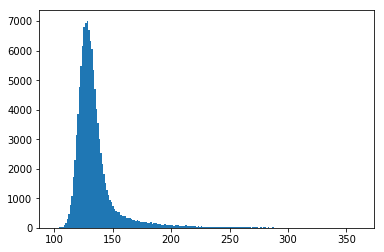

In [8]:
plt.hist(data[4,:], bins=200)
plt.show()

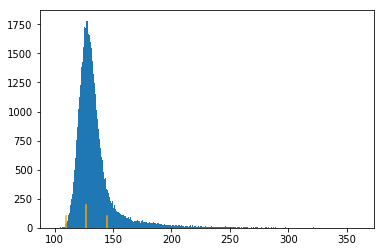

In [14]:
b = binarize(data[4, :], disp=True)

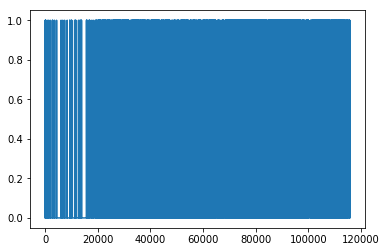

In [15]:
plt.plot(b)
plt.show()

In [17]:
# batch process data
data_bin = np.asarray(dview.map_sync(binarize, list(data)))

In [ ]:
np.save('../../neuroscience dataset/fluordata1_bin.npy', data_bin)

---
## MDPD